Enter the number of qubits:  3
Enter the number of shots:  100000


Quantum random number =  110
Numeric value =  6

Full distribution =  {'111': 12503, '100': 12506, '011': 12600, '110': 12449, '010': 12620, '001': 12331, '101': 12368, '000': 12623}


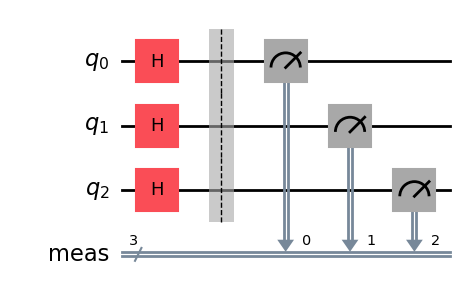

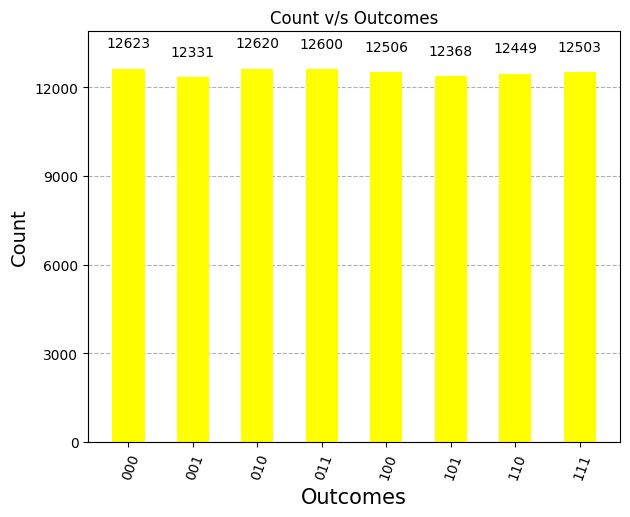

In [2]:
#Name: KUNAL PARESH CHAVAN
#Project Title: Quantum Random Number Generator
#****NOTE: This Code works very well in JUPYTER NOTEBOOK****
#----------------------------------------------------------------------
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

#Defining a function
def f(qubit,shot):
    qc = QuantumCircuit(qubit) # Create quantum circuit
#----------------------------------------------------------------------   
    for i in range(0,qubit):   #Applying Hadamard gate to each qubit
        qc.h(i)
#----------------------------------------------------------------------    
    qc.measure_all()           #Measurement
    qc.draw('mpl')             #Drawing the Circuit
#----------------------------------------------------------------------    
    sim = AerSimulator()       #Running the Simulator
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=shot,memory=True).result()
#----------------------------------------------------------------------    
    memory=result.get_memory(compiled)   #Getting the Results
    counts = result.get_counts()
#----------------------------------------------------------------------
    #Choosing one output randomly, weighted by quantum probabilities
    outcomes = list(counts.keys())                       
    probabilities = np.array(list(counts.values())) / shot 
    random_output = np.random.choice(outcomes, p=probabilities)
#----------------------------------------------------------------------
    #Displying the random number and it's numeric value
    print("Quantum random number = ", random_output)
    numeric_value = int(random_output, 2)
    print("Numeric value = ", numeric_value)
    print("\nFull distribution = ", counts)
#----------------------------------------------------------------------
    #Plotting the Distribution using Histogram
    plot_histogram(counts,color='yellow')
    plt.xlabel("Outcomes", size=15)
    plt.title("Count v/s Outcomes")
    plt.show()
#----------------------------------------------------------------------
#Getting the user input
Qubit=int(input("Enter the number of qubits: ")) 
Shots=int(input("Enter the number of shots: "))
#----------------------------------------------------------------------
f(Qubit,Shots) #Calling the function
